In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import glob
files = glob.glob("/content/drive/MyDrive/Afame Technologies Dataset/IRIS Flower.csv")
print(files)

['/content/drive/MyDrive/Afame Technologies Dataset/IRIS Flower.csv']


# **1. Load the dataset**

In [ ]:
# load the iris dataset
iris_data = pd.read_csv('/content/drive/MyDrive/Afame Technologies Dataset/IRIS Flower.csv')

# **2. Quick dataset summary**


# 2.0 Do we have missing data?

In [ ]:
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(iris_data)

Number of columns with missing values: 0
No misisng data!!!


In [ ]:
# take a peek
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **2.1 Dimension of the dataset**

In [ ]:
# dimension
print("the dimension:", iris_data.shape)

the dimension: (150, 5)


# **2.2 Statistical summary using .describe()**

In [ ]:
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# 2.3 Distribution of each class

In [ ]:
# class distribution
print(iris_data.groupby('species').size())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# **3. Explore data with visualization**

In [ ]:
# import ploting tool
import matplotlib.pyplot as plt

# **3.1 Let's visualize the distribution:**

Text(0, 0.5, 'count')

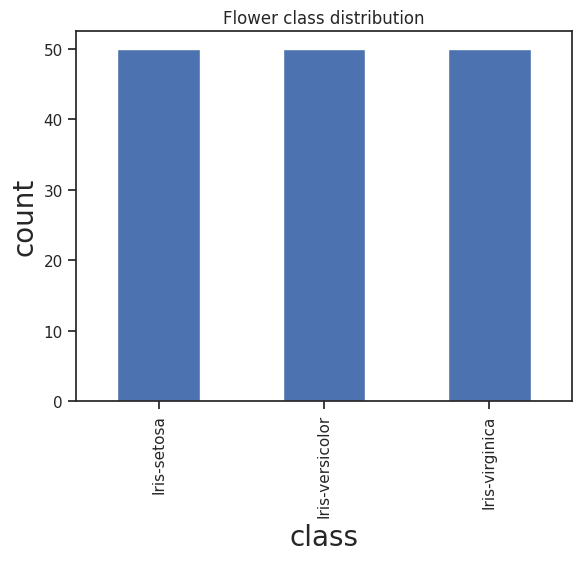

In [ ]:
# iris flower dataset class distribution
nameplot = iris_data['species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

# **3.2 Box and Whisker plot:**

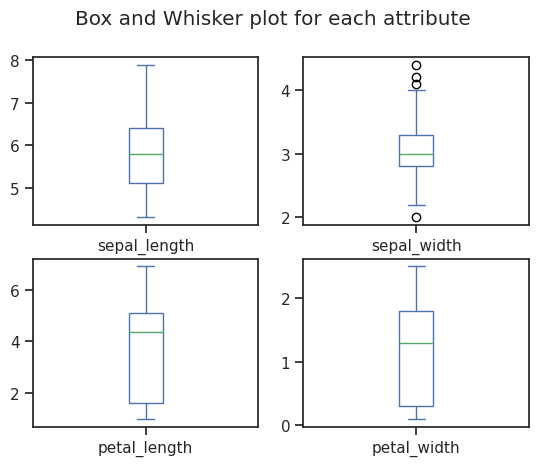

In [ ]:
# box and whisker plots
iris_data.plot(kind='box', subplots=True, layout=(2,2),
               sharex=False, sharey=False, title="Box and Whisker plot for each attribute")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris_data = pd.read_csv('/content/drive/MyDrive/Afame Technologies Dataset/IRIS Flower.csv')

# **3.3 Histogram:**

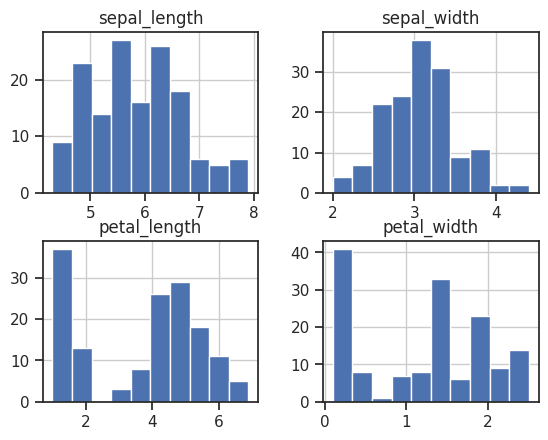

In [ ]:
# plot histogram
iris_data.hist()
plt.show()

# **3.4 Multivariate scatter plot:**

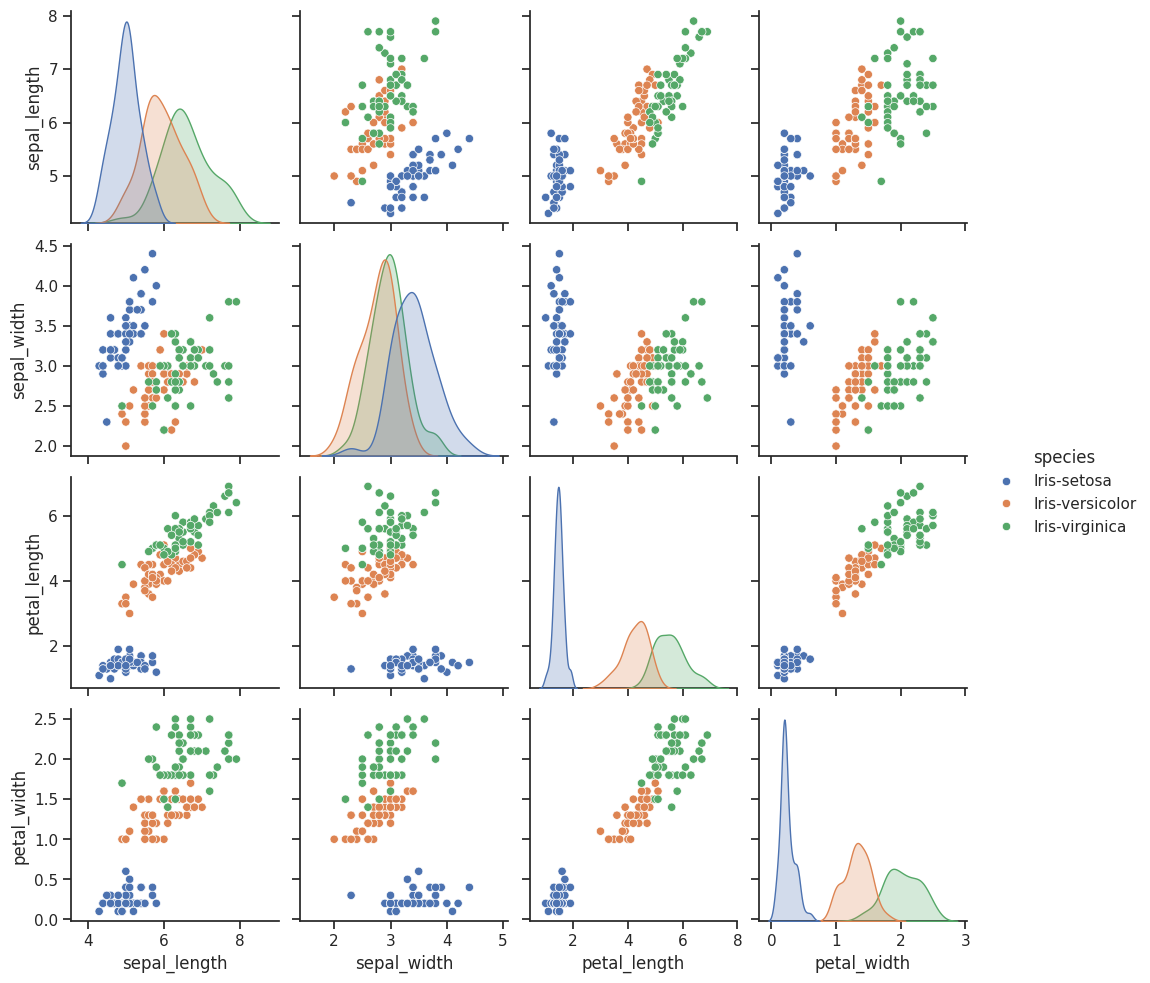

In [ ]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris_data, hue="species")

# **4. Data Modeling:**

# **4.1 Train-Test Split:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris_data.drop(['species'], axis=1)
Y = iris_data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


# **4.2 Models Building**

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
# Define the models
models = [
    ("LR", LogisticRegression(solver="liblinear", multi_class="auto")),
    #("LDA", LinearDiscriminantAnalysis()),
    ("CART", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("GNB", GaussianNB()),
    ("SVC", SVC(gamma="auto")),
]

# Evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evaluate model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")

    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:
LR: accuracy=0.958333 std=(0.055902)
CART: accuracy=0.950000 std=(0.076376)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.966667 std=(0.040825)
SVC: accuracy=0.991667 std=(0.025000)


In [ ]:
# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:
LR: accuracy=0.958333 std=(0.055902)
CART: accuracy=0.958333 std=(0.076830)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.966667 std=(0.040825)
SVC: accuracy=0.991667 std=(0.025000)


In [ ]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
#models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [ ]:
accuracy = [accuracy][0]

Text(0.5, 1.0, 'Model Accuracy Comparison')

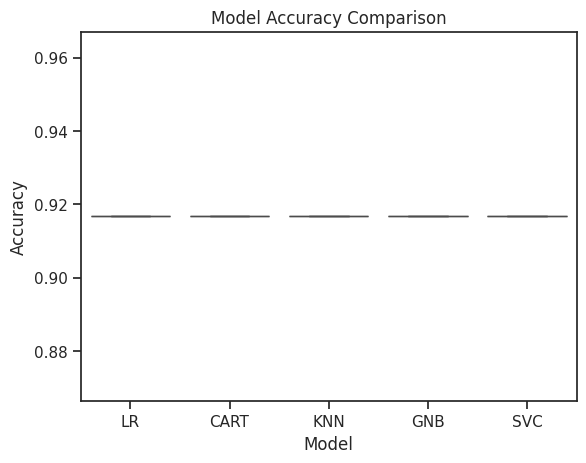

In [ ]:
data = {'Model': names, 'Accuracy': accuracy}
df = pd.DataFrame(data)

ax = sns.boxplot(data=df, x='Model', y='Accuracy')
ax.set_title('Model Accuracy Comparison')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set

    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [ ]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei